<h1><center>Comparison of New York City and San Francisco using GDP data.</center></h1>

<h2><center>Question 1: description of the problem and a discussion of the background</center></h2>
<h3>I wanted to view the difference between the GDP of New York [New York City] and California [San Francisco] to see which sectors {industries} are similar in GDP. In order to obtain the relevant GDP information I had to use the state GDP data of both New York and California (north and south). </h3>

In [13]:
import requests
import pandas as pd
import numpy as np

import json
import requests
from pandas.io.json import json_normalize

import geocoder
from geopy.geocoders import Nominatim
import folium

!pip install git+https://github.com/psychemedia/ipython_magic_folium.git
!pip install geocoder
!pip install folium

  Cloning https://github.com/psychemedia/ipython_magic_folium.git to /tmp/wsuser/pip-req-build-4lnqprqd
  Running command git clone -q https://github.com/psychemedia/ipython_magic_folium.git /tmp/wsuser/pip-req-build-4lnqprqd
     |████████████████████████████████| 14.8 MB 6.9 MB/s eta 0:00:01
  Created wheel for ipython-magic-folium: filename=ipython_magic_folium-0.0.0-py3-none-any.whl size=5946 sha256=9b2c5a10604508ae0514c8e878b6dd23feb19e716fbbba66aac3eae97556131f
  Stored in directory: /tmp/wsuser/pip-ephem-wheel-cache-_fwtoky4/wheels/60/80/f3/da41a4961e6eea1db3a46e0bba621f9cd945089c2070fc3676
Successfully built ipython-magic-folium


<h2>New York (State) GDP Data.</h2>

In [14]:
url = "https://www.statista.com/statistics/304883/new-york-real-gdp-by-industry/"
response = requests.get(url)
df_NewYork = pd.read_html(response.content, header=0)[0]
df_NewYork.set_index('Industry', inplace=True)
df_NewYork.head(20)

,Real value added in billion chained (2012) U.S. dollars
Industry,
"Finance, insurance, real estate, rental, and leasing",433.11
Professional and business services,211.36
Information,162.04
Government and government enterprises,154.88
"Educational services, health care, and social assistance",146.19
Retail trade,71.56
"Arts, entertainment, recreation, accommodation, and food services",66.90
Wholesale trade,65.57
Manufacturing,64.83


<h2>California (State) GDP Data.</h2>

In [15]:
url = "https://www.statista.com/statistics/304869/california-real-gdp-by-industry/"
response2 = requests.get(url)
df_California = pd.read_html(response2.content, header=0)[0]
df_California.set_index('Industry', inplace=True)
df_California.head(20)

,Real value added in billion chained (2012) U.S. dollars
Industry,
"Finance, insurance, real estate, rental, and leasing",558.22
Professional and business services,391.10
Information,326.81
Manufacturing,318.82
Government and government enterprises,292.07
"Educational services, health care, and social assistance",204.26
Retail trade,148.58
Wholesale trade,144.43
"Arts, entertainment, recreation, accommodation, and food services",112.66


In [16]:
combined_data = pd.concat([df_NewYork,df_California], axis =1, join='inner')
combined_data.columns = ['New York GDP', 'California GDP']
combined_data

,New York GDP,California GDP
Industry,,
"Finance, insurance, real estate, rental, and leasing",433.11,558.22
Professional and business services,211.36,391.10
Information,162.04,326.81
Government and government enterprises,154.88,292.07
"Educational services, health care, and social assistance",146.19,204.26
Retail trade,71.56,148.58
"Arts, entertainment, recreation, accommodation, and food services",66.90,112.66
Wholesale trade,65.57,144.43
Manufacturing,64.83,318.82


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

<h2><center>Visualization of combined GDP data.</center></h2>

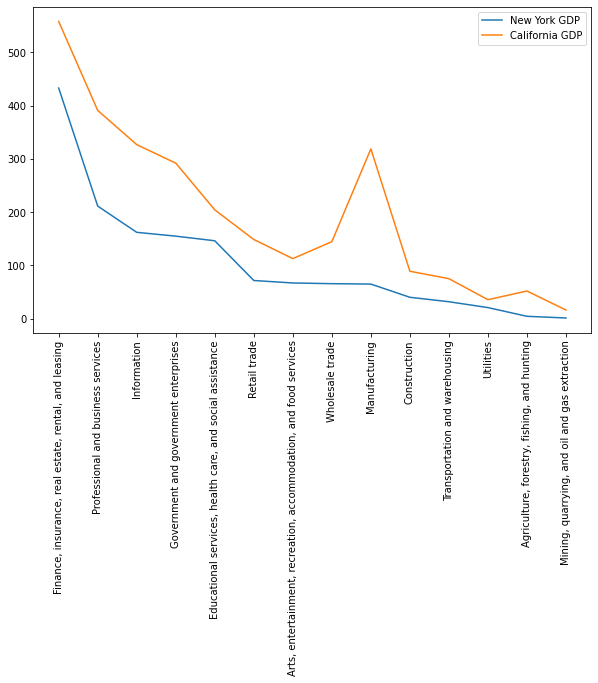

In [18]:
fog, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
plt.plot(combined_data)
plt.legend(combined_data)
plt.show()

<h2><center>Question 2. description of the data and how it will be used to solve the problem.</center> </h2>

<h3>Using the information above I can see the most common forms of GDP in both New York and California are in the financial sector; I will now use extra GDP information to analysis revenues and profitability of companies to see if they match my data.</h3>

<h1>Top 500 Companies in the State New York</h1>

In [19]:
url = "https://money.cnn.com/magazines/fortune/fortune500/2010/states/NY.html"
response2 = requests.get(url)
df2 = pd.read_html(response2.content, header=0)[0]
df2.set_index('StateRank', inplace=True)
df2.head()
df2.dropna()

,Company,Fortune 500 rank,City,Revenues($ millions)
StateRank,,,,
1,J.P. Morgan Chase & Co.,9.0,New York,115632.0
2,Citigroup,12.0,New York,108785.0
3,Verizon Communications,13.0,New York,107808.0
4,American International Group,16.0,New York,103189.0
5,International Business Machines,20.0,Armonk,95758.0
6,Goldman Sachs Group,39.0,New York,51673.0
7,Pfizer,40.0,New York,50009.0
8,PepsiCo,50.0,Purchase,43232.0
9,MetLife,51.0,New York,41098.0


<h1>Top 500 Companies in the State California</h1>

In [20]:
url = "https://money.cnn.com/magazines/fortune/fortune500/2010/states/CA.html"
response2 = requests.get(url)
df3 = pd.read_html(response2.content, header=0)[0]
df3.set_index('StateRank', inplace=True)

df3.head()
df3.dropna()

,Company,Fortune 500 rank,City,Revenues($ millions)
StateRank,,,,
1,Chevron,3.0,San Ramon,163527.0
2,Hewlett-Packard,10.0,Palo Alto,114552.0
3,McKesson,14.0,San Francisco,106632.0
4,Wells Fargo,19.0,San Francisco,98636.0
5,Safeway,52.0,Pleasanton,40850.7
6,Apple,56.0,Cupertino,36537.0
7,Walt Disney,57.0,Burbank,36149.0
8,Cisco Systems,58.0,San Jose,36117.0
9,Northrop Grumman,61.0,Los Angeles,35291.0


<h1><center>Using GDP data of both New York and California I can derive that the cities of San Francisco and New York city have the most top ranking companies.</center></h1>

In [21]:
df3['City'].value_counts()

San Francisco          7
Los Angeles            5
Santa Clara            4
San Jose               3
El Segundo             3
Irvine                 3
Santa Ana              2
Sunnyvale              2
Mountain View          2
Redwood City           2
San Mateo              2
Pleasanton             2
Pasadena               2
San Diego              2
Burbank                1
Westlake Village       1
Fremont                1
Oakland                1
Newport Beach          1
Lake Forest            1
Rosemead               1
Palo Alto              1
Foster City            1
Woodland Hills         1
South San Francisco    1
San Ramon              1
Beverly Hills          1
Thousand Oaks          1
Cupertino              1
Sylmar                 1
Name: City, dtype: int64

In [22]:
df2['City'].value_counts()

New York        42
White Plains     2
Melville         2
Purchase         2
Islandia         1
Rye Brook        1
Corning          1
Somers           1
Armonk           1
Rochester        1
Bethpage         1
Rye              1
Name: City, dtype: int64

<h1><center>I will now compare the cities to see if the top 500 companies in each city match the GDP visual graph data.</center></h1>

<h1><center>Where the top 5 companies in San Francisco are located.</center></h1>

In [42]:
%load_ext folium_magic

The folium_magic extension is already loaded. To reload it, use:
  %reload_ext folium_magic


In [43]:
markers=[{'lat':37.7893269815935, 'lng':-122.39966990292696,'popup':'San Francisco, McKesson Corporation'},{'lat':37.793237, 'lng':-122.402845,'popup':'San Francisco, Wells Fargo'},{'lat':37.790829735813524, 'lng':-122.39056889129745,'popup':'San Francisco, Gap'},{'lat':37.793237, 'lng':-122.402845,'popup':'San Francisco, Wells Fargo'},{'lat':37.79173269097296, 'lng':-122.39550163731609,'popup':'San Francisco, PG&E Corp.'}]

In [45]:
%folium_map -M markers -z 20